# SELECT FEATURES

Select features là một trong những khái niệm cốt lõi trong Machine Learning, nó tác động rất lớn đến hiệu suất của mô hình:
- **Reduces Overfitting - Giảm Overfitting**: Ít dữ liệu dư thừa hơn có nghĩa là ít cơ hội để đưa ra quyết định dựa trên nhiễu.
- **Improves Accuracy - Cải thiện độ chính xác**: Dữ liệu ít sai lệch hơn có nghĩa là độ chính xác của mô hình được cải thiện.
- **Reduces Training Time - Giảm thời gian huấn luyện**: ít điểm dữ liệu hơn làm giảm độ phức tạp của thuật toán và thuật toán huấn luyện nhanh hơn.

## 1. Data sources


> Task 1: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

> Task 2: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv

## 2. Execute techniques

### 2.1. Task 1 - Data from classifying prices of mobile phone

Import and read data:

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("ex3.2.csv")

Phân chia các cột phụ thuộc và cột mục tiêu `price_range`:

In [ ]:
X = data.iloc[:,0:20]
y = data.iloc[:,-1]

#### 2.1.1. Univariate Selection - Lựa chọn đơn biến

Phương pháp này hoạt động bằng cách chọn các feature tốt nhất dựa trên các thử nghiệm thống kê đơn biến.

Sử dụng `SelectKBest` để trích xuất 10 feature tốt nhất:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


Nối hai khung dữ liệu để hình dung tốt hơn:

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #  naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #  print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


#### 2.1.2. Feature Importance - Tầm quan trọng của Feature

Phương pháp này hoạt động bằng cách đánh giá mức độ quan trọng của từng feature và đưa ra số điểm dựa theo đó.

Sử dụng `ExtraTreesClassifier` để trích xuất 10 feature tốt nhất:

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.06017806 0.02093205 0.03413966 0.0200053  0.03327067 0.0172817
 0.03760891 0.035398   0.03585611 0.0326356  0.03479968 0.04657162
 0.04989483 0.38195552 0.03539501 0.03444212 0.03606451 0.01526508
 0.01772349 0.02058207]


Vẽ biểu đồ để hình dung tốt hơn:

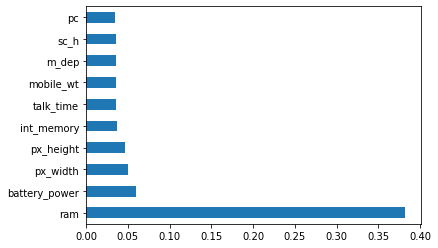

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### 2.1.3. Correlation Matrix - Ma trận tương quan

Phương pháp này hoạt động bằng cách đánh giá sự tương quan giữa các feature và biến mục tiêu.

Thu thập mối tương quan với từng feature trong tập dữ liệu và vẽ heatmap:

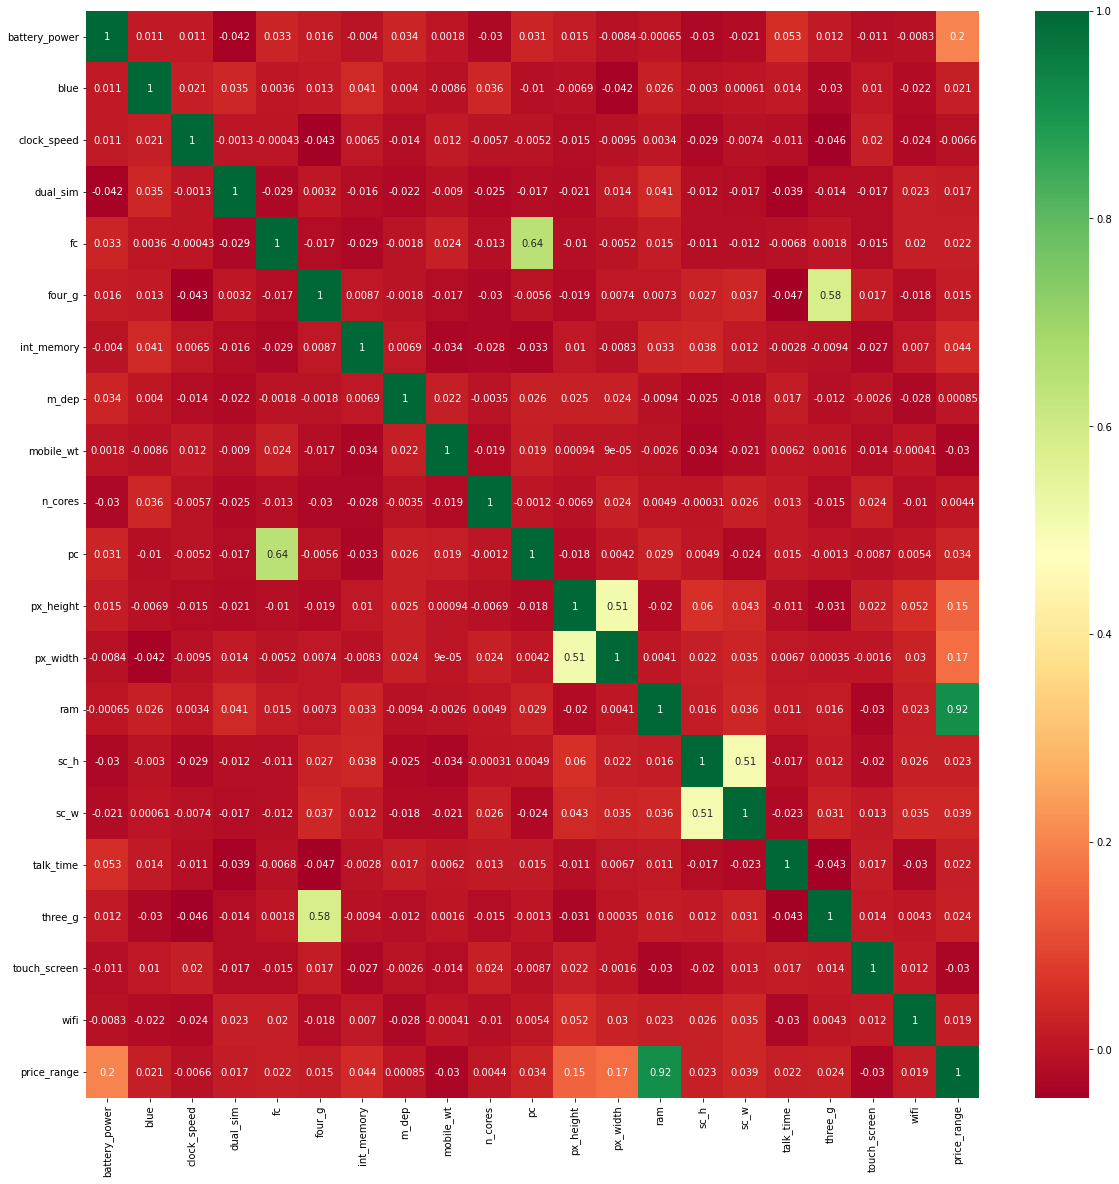

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 20))
g = sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

Nhìn vào biểu đồ ở hàng cuối cùng `price_range`, ta có thể thấy mối tương quan giữa từng feature với nó, tương quan càng cao thì feature càng quan trọng.

### 2.2. Task 2 - Data from chapter 12 in [1.1]

Import and read data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes.csv')

Cleaning data

In [ ]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())
#---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


- Không có giá trị null, không cần thay thế.
- Đối với 2 feature là `Pregnancies` và `Outcome`, có giá trị 0 là chuyện bình thường nên ta không cần thay thế.

In [ ]:
# Các feature còn lại là các cột ở giữa:
df.iloc[:,1:-1] = df.iloc[:,1:-1].replace(0, np.NaN)

Thay thế `NaN` bằng các giá trị trung bình:

In [ ]:
df.fillna(df.mean(), inplace = True)

Phân chia các cột phụ thuộc và cột mục tiêu `Outcome`:

In [ ]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

#### 2.2.1. Use Correlation Matrix - Sử dụng ma trận tương quan

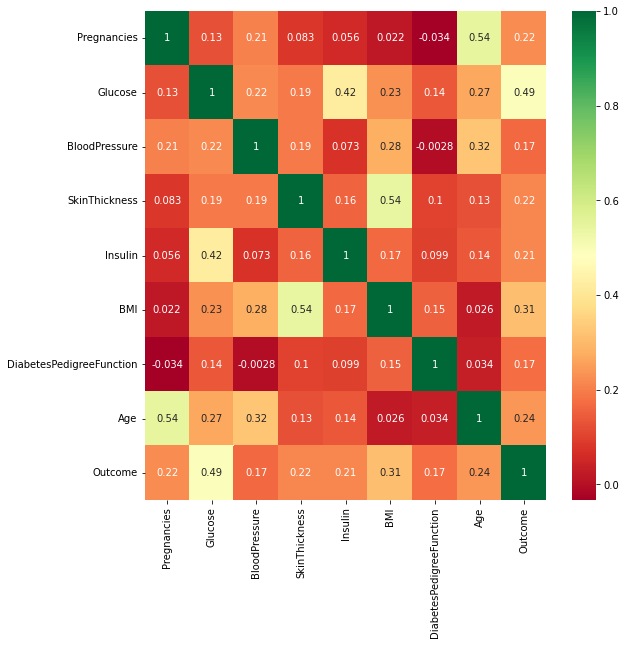

In [ ]:
import seaborn as sns
plt.figure(figsize=(9, 9))
g = sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

#### 2.2.2. Use Univariate Selection - Sử dụng phương pháp lựa chọn đơn biến

Có tổng cộng 8 features, ta sẽ trích xuất ra 4 features bằng phương pháp này:

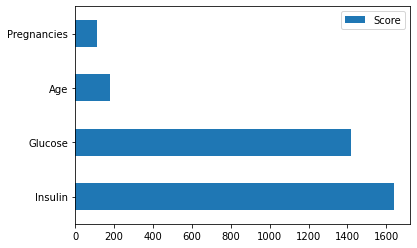

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.index = X.columns
result = featureScores.nlargest(4,'Score')
result.plot(kind='barh')
plt.show()

#### 2.2.3. Use Feature Importance Evaluation - Sử dụng phương pháp đánh giá tầm quan trọng của Feature

Có tổng cộng 8 features, ta sẽ trích xuất ra 4 features bằng phương pháp này:

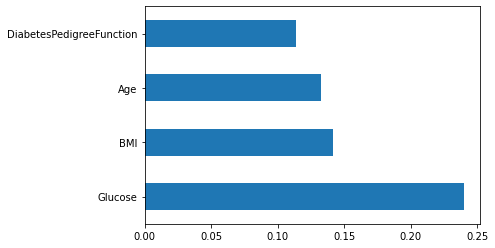

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

# CLEANING DATA

Là quá trình thay đổi hoặc loại bỏ dữ liệu không chính xác, trùng lặp, bị hỏng hoặc không đầy đủ. Nếu dữ liệu không chính xác, các thuật toán và kết quả cho ra không đáng tin cậy.

Các thao tác thường thấy:
- Loại bỏ dữ liệu.
- Sửa lỗi cú pháp và chính tả.
- Sửa đổi các lỗi như thiếu mã, trường trống.
- Xác định các điểm dữ liệu trùng lặp và chuẩn hóa tập dữ liệu.

Yêu cầu về chất lượng của dữ liệu:
- **Tính hợp lệ**: Mức độ phù hợp với các ràng buộc và quy tắc kinh doanh đã xác định mà dữ liệu cung cấp.
- **Độ chính xác**: Dữ liệu phải có khả năng mô tả các giá trị thực và tốt nhất.
- **Tính đầy đủ**: Mức độ quen thuộc của tất cả dữ liệu được yêu cầu.
- **Tính nhất quán**: Tính nhất quán về dữ liệu trong cùng một cơ sở dữ liệu và trên các tập dữ liệu khác nhau.
- **Tính đồng nhất**: Mức độ dữ liệu được tuân theo cùng một đơn vị đo lường.

## 1. Data sources

> Task 1: https://www.kaggle.com/c/sberbank-russian-housing-market/data?select=train.csv.zip

> Task 2: https://www.tutorialspoint.com/python_data_science/python_data_cleansing.htm

> Task 3: https://www.w3schools.com/python/pandas/pandas_cleaning.asp

> Task 4: https://realpython.com/python-data-cleaning-numpy-pandas/

## 2. Execute techniques

### 2.1. Task 1 - Data from Sberbank Russian Housing Market

Import and read data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('housing_data.csv')

Kiểm tra số hàng và cột:

In [ ]:
df.shape

(30471, 292)

Tách các cột số và các cột còn lại ra làm 2 phần:

In [ ]:
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

#### 2.1.1. Missing values - Xử lý thiếu giá trị

Bắt đầu bằng cách tính toán tỷ lệ phần trăm giá trị bị thiếu trong mỗi cột, và sau đó lưu trữ thông tin này trong một DataFrame.

In [ ]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

`pct_missing_df` hiện giờ sẽ chứa phần trăm giá trị bị thiếu trong mỗi cột cùng với tên cột:

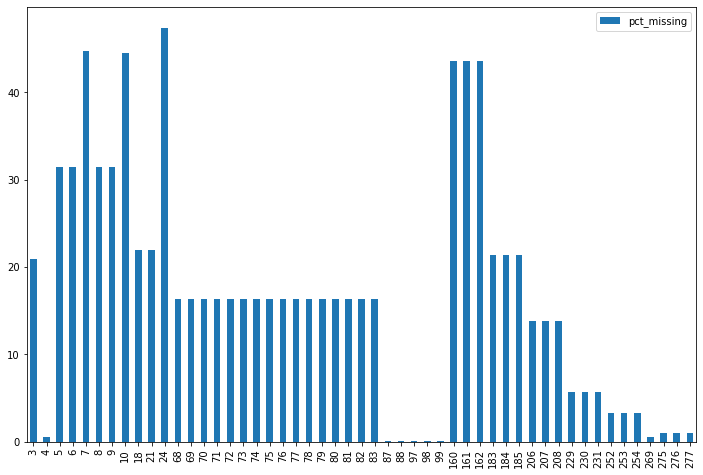

In [ ]:
pct_missing_df.loc [pct_missing_df.pct_missing> 0] .plot (kind = 'bar', figsize = (12,8)) 
plt.show ()

Có một vài cách xử lý:

##### Drop observations

Loại bỏ theo dõi các cột không chứa hoặc chứa ít giá trị null (không quá 0.5%):

In [ ]:
less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.5) & (pct_missing_df.pct_missing > 0), 'col'].values)
df.dropna(subset=less_missing_values_cols_list, inplace=True)

NameError: ignored

##### Remove features

Xóa bỏ những feature chứa quá nhiều bản ghi có giá trị null (nhiều hơn 40%):

In [ ]:
# dropping columns with more than 40% null values
_40_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 40, 'col'].values)
df.drop(columns=_40_pct_missing_cols_list, inplace=True)

##### Impute missing values

Những giá trị bị thiếu còn lại sẽ được thay thế bằng giá trị trung bình của cột:

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = df[col].median() # impute with the median
        df[col] = df[col].fillna(med)

Với trường hợp dành cho các cột không có kiểu dữ liệu số, thay thế bằng giá trị xuất hiện nhiều nhất trong cột:

In [ ]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = df[col].describe()['top'] # impute with the most frequently occuring value
        df[col] = df[col].fillna(mod)

Kiểm tra:

In [ ]:
df.isnull().sum().sum()

0

#### 2.1.2. Outliers - Xử lý dữ liệu ngoại lai

Dữ liệu ngoại lai là những dữ liệu bất thường, có giá trị khác xa với giá trị trung bình của cùng feature.

Ví dụ với cột `life_sq`, ta sẽ xem thống kê:

In [ ]:
df.life_sq.describe ()

count    30446.000000
mean        33.482658
std         46.538609
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

Ta thấy, giá trị tối đa rất lớn so với giá trị trung bình và giá trị trung vị của feature, ta có thể thử quan sát qua biểu đồ:

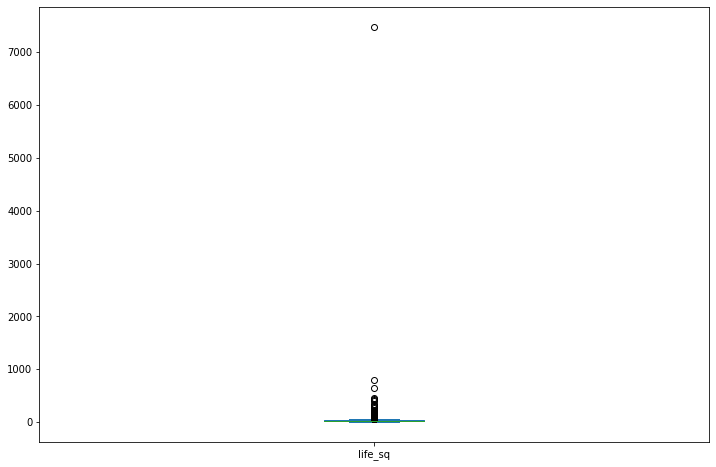

In [ ]:
df.life_sq.plot(kind = 'box', figsize = (12, 8)) 
plt.show()

Để xử lý, ta có thể thay thế nó bằng giá trị phù hợp hoặc đơn giản là loại bỏ bản ghi này:

In [ ]:
# removing the outlier value in life_sq column
df = df.loc[df.life_sq < 7478]

#### 2.1.3. Duplicate records - Xử lý các bản ghi trùng lặp

Sẽ có thể có những bản ghi dữ liệu bị trùng lặp.

Trong tập dữ liệu này, ID là cột duy nhất giúp nhận dạng và phân biệt các bản ghi, ta sẽ thực hiện loại bỏ các bản ghi trùng lặp dữ liệu cột ID.

In [ ]:
# dropping duplicates by considering all columns other than ID
cols_other_than_id = list(df.columns)[1:]
df.drop_duplicates(subset=cols_other_than_id, inplace=True)

#### 2.1.4. Fixing data type - Xử lý sai kiểu dữ liệu

Trong tập dữ liệu sẽ có thể có những giá trị không được lưu trữ theo kiểu dữ liệu chính xác.

Ví dụ với loại lỗi dữ liệu phổ biến là ngày tháng, ta sẽ kiểm tra cột `timestamp`:

In [ ]:
df.timestamp.dtype

dtype('O')

Kết quả trả về kiểu dữ liệu là "Object", ta hiểu rằng dữ liệu trong cột không đồng bộ và không đúng kiểu dữ liệu ta mong muốn, do đó, sửa kiểu dữ liệu thành `pandas.DateTime`:

In [ ]:
# converting timestamp to datetime format
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')

Tương tự cho các cột còn lại.

### 2.2. Task 2 - Run examples from website

#### 2.2.1. Replace NaN with a Scalar Value

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(3, 3), index=['a', 'c', 'e'],columns=['one', 'two', 'three'])
df = df.reindex(['a', 'b', 'c'])

In [ ]:
print('Before:')
df

Before:


,one,two,three
a,-0.855020,-0.872619,-0.858281
b,NaN,NaN,NaN
c,-0.866334,0.828542,-1.089308


In [ ]:
print('After:')
df.fillna(0)

After:


,one,two,three
a,-0.855020,-0.872619,-0.858281
b,0.000000,0.000000,0.000000
c,-0.866334,0.828542,-1.089308


#### 2.2.2. Fill NA Forward and Backward

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])
df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [ ]:
print('Before:')
df

Before:


,one,two,three
a,-0.262295,-0.871116,0.836231
b,NaN,NaN,NaN
c,-0.069557,1.037428,-1.689484
d,NaN,NaN,NaN
e,-0.614182,-0.304629,0.781414
f,0.904688,0.102811,1.185331
g,NaN,NaN,NaN
h,0.614188,0.480085,0.495884


In [ ]:
print('After:')
df.fillna(method='pad')

After:


,one,two,three
a,-0.262295,-0.871116,0.836231
b,-0.262295,-0.871116,0.836231
c,-0.069557,1.037428,-1.689484
d,-0.069557,1.037428,-1.689484
e,-0.614182,-0.304629,0.781414
f,0.904688,0.102811,1.185331
g,0.904688,0.102811,1.185331
h,0.614188,0.480085,0.495884


#### 2.2.3. Drop Missing Values

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])
df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [ ]:
print('Before:')
df

Before:


,one,two,three
a,0.684887,-0.273856,-0.542115
b,NaN,NaN,NaN
c,-1.140078,-0.033533,-1.556200
d,NaN,NaN,NaN
e,0.599668,0.530070,0.272741
f,-1.118981,-0.439424,-0.813986
g,NaN,NaN,NaN
h,-0.785318,2.534680,-0.250454


In [ ]:
print('After:')
df.dropna()

After:


,one,two,three
a,0.684887,-0.273856,-0.542115
c,-1.140078,-0.033533,-1.556200
e,0.599668,0.530070,0.272741
f,-1.118981,-0.439424,-0.813986
h,-0.785318,2.534680,-0.250454


#### 2.2.4. Replace Missing (or) Generic Values

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'one':[10,20,30,40,50,2000],
'two':[1000,0,30,40,50,60]})

In [ ]:
print('Before:')
df

Before:


,one,two
0,10,1000
1,20,0
2,30,30
3,40,40
4,50,50
5,2000,60


In [ ]:
print('After:')
df.replace({1000:10,2000:60})

After:


,one,two
0,10,10
1,20,0
2,30,30
3,40,40
4,50,50
5,60,60


### 2.3. Task 3 - Cleaning data with data from website

### 2.4. Task 4 - Cleaning data with data from website